In [1]:
# Import all necessary datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bos = pd.read_csv("data/listings.csv")
# bos = bos[['name', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]


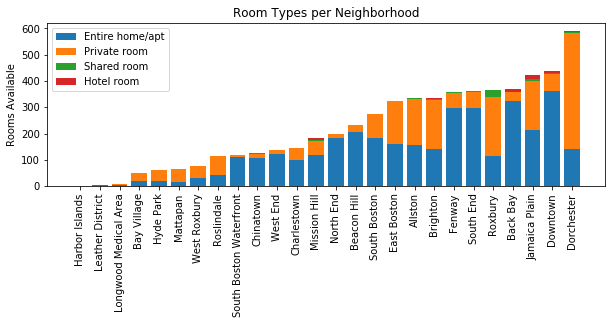

In [2]:
neighs = bos.groupby(['neighbourhood', 'room_type'], as_index=False).count().sort_values('name')
roomTypes = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
neighPivot = neighs.pivot(index='neighbourhood', columns='room_type', values='name')
neighPivot['Tot'] = neighPivot.sum(axis=1)
neighPivot = neighPivot.sort_values('Tot')
neighPivot.fillna(0, inplace=True)
neighPivot

plt.figure(figsize=(10,3))
neighPivot['zero'] = 0
bot = neighPivot['zero']
plt.title("Room Types per Neighborhood")
for roomType in roomTypes:
    plt.bar(neighPivot.index, neighPivot[roomType], bottom=bot, label=roomType)
    bot += neighPivot[roomType]
plt.xticks(rotation=90)
plt.ylabel("Rooms Available")
plt.legend()
plt.show()

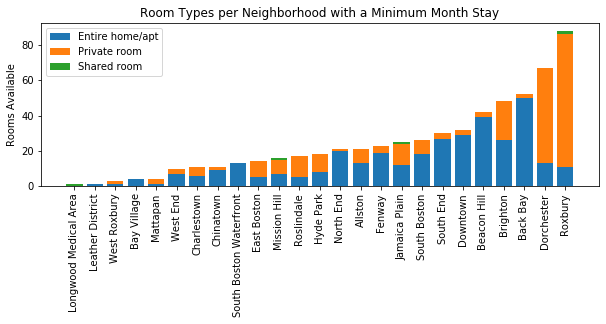

In [3]:
halfYear = bos[bos['minimum_nights'] >= 28]

neighs = halfYear.groupby(['neighbourhood', 'room_type'], as_index=False).count().sort_values('name')
roomTypes = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
neighPivot = neighs.pivot(index='neighbourhood', columns='room_type', values='name')
neighPivot['Tot'] = neighPivot.sum(axis=1)
neighPivot = neighPivot.sort_values('Tot')
neighPivot.fillna(0, inplace=True)
neighPivot

plt.figure(figsize=(10,3))
neighPivot['zero'] = 0
bot = neighPivot['zero']
plt.title('Room Types per Neighborhood with a Minimum Month Stay')
for roomType in roomTypes:
    try:
        plt.bar(neighPivot.index, neighPivot[roomType], bottom=bot, label=roomType)
        bot += neighPivot[roomType]
    except:
        pass
plt.xticks(rotation=90)
plt.ylabel('Rooms Available')
plt.legend()
plt.show()

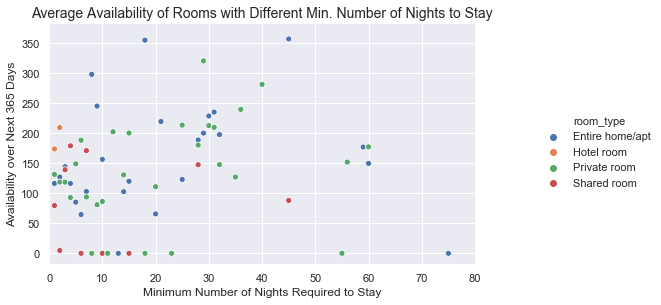

In [4]:
sns.set()

bos_min_night_rm_typ = bos[['availability_365', 'minimum_nights','calculated_host_listings_count', 'room_type']].groupby(['minimum_nights', 'room_type']).mean()
bos_min_night_rm_typ.reset_index(inplace=True)

# fgrid = sns.FacetGrid(bos_min_night_rm_typ, col="room_type")
# fgrid = fgrid.map(plt.scatter, "minimum_nights", "availability_365")
sns.relplot(x='minimum_nights', y='availability_365',
            hue='room_type',data=bos_min_night_rm_typ)

plt.title('Average Availability of Rooms with Different Min. Number of Nights to Stay', fontsize = 14)
plt.xlabel('Minimum Number of Nights Required to Stay', fontsize = 12)
plt.ylabel('Availability over Next 365 Days', fontsize = 12)
plt.xlim((0, 80))
# plt.ylim((0, 200))

plt.gcf().set_size_inches(10,4)

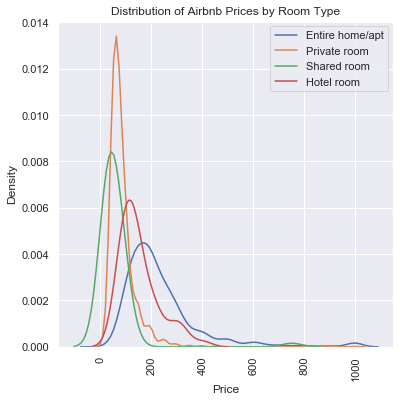

In [5]:
halfYear = bos[(bos['price'] <= 1000)]

plt.figure(figsize=(6,6))
plt.title("Distribution of Airbnb Prices by Room Type")
for rType in roomTypes:
    sns.distplot(halfYear[halfYear['room_type'] == rType]['price'], hist=False, label=rType)
plt.xticks(rotation=90)
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

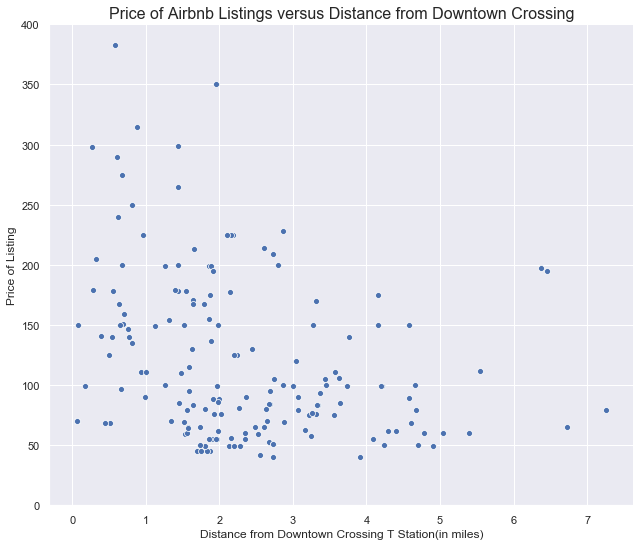

In [6]:
from math import radians, cos, sin, atan2, sqrt
# Compute the distance between two points on Earth using the Haversine formula, in miles
def haversine_from_dt_crossing(row):
    lon_dc = -71.0594
    lat_dc = 42.3555
    
    radius = 3959
    
    lon_sr, lat_sr = row['longitude'], row['latitude']
    
    lon_dc, lat_dc, lon_sr, lat_sr = map(radians, [lon_dc, lat_dc, lon_sr, lat_sr])
    
    dlon = lon_dc - lon_sr
    dlat = lat_dc - lat_sr
    
    a = sin(dlat/2)**2 + cos(lat_dc) * cos(lat_sr) * sin(dlon/2)**2
    
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = radius * c

    return d
condition = (bos.reviews_per_month > 7)
bos_alt = bos[condition]
bos_alt = bos_alt[["price", "longitude", "latitude", "availability_365"]]

bos_alt['distance'] = bos.apply(haversine_from_dt_crossing, axis = 1)

sns.relplot(x='distance', y='price',
            data=bos_alt)

plt.ylim((0, 400))
plt.title('Price of Airbnb Listings versus Distance from Downtown Crossing', fontsize = 16)
plt.xlabel('Distance from Downtown Crossing T Station(in miles)', fontsize = 12)
plt.ylabel('Price of Listing', fontsize = 12)

plt.gcf().set_size_inches(10,8)

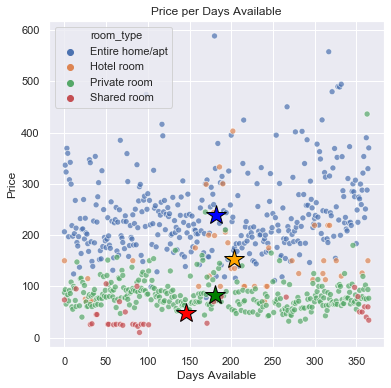

In [7]:
prev2 = bos[bos['price'] < 2000]
prev2 = prev2.groupby(['room_type', 'availability_365'], as_index=False).mean()

plt.figure(figsize=(6,6))
plt.title('Price per Days Available')
sns.scatterplot(data=prev2, x='availability_365', y='price', hue='room_type', alpha=.7)
plt.plot(prev2[prev2['room_type']=='Entire home/apt']['availability_365'].mean(), prev2[prev2['room_type']=='Entire home/apt']['price'].mean(), '*', mec='black', c='blue', markersize=20)
plt.plot(prev2[prev2['room_type']=='Private room']['availability_365'].mean(), prev2[prev2['room_type']=='Private room']['price'].mean(), '*', mec='black', c='green', markersize=20)
plt.plot(prev2[prev2['room_type']=='Hotel room']['availability_365'].mean(), prev2[prev2['room_type']=='Hotel room']['price'].mean(), '*', mec='black', c='orange', markersize=20)
plt.plot(prev2[prev2['room_type']=='Shared room']['availability_365'].mean(), prev2[prev2['room_type']=='Shared room']['price'].mean(), '*', mec='black', c='red', markersize=20)
plt.legend()
plt.ylabel('Price')
plt.xlabel('Days Available')
plt.show()

(-50, 700)

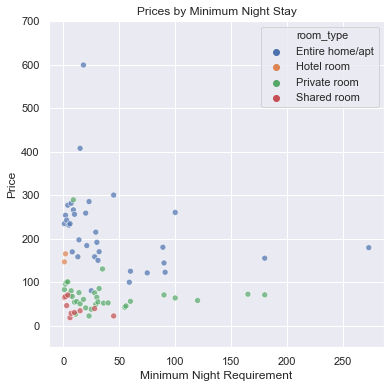

In [8]:
plt.figure(figsize=(6,6))

year2K = bos[(bos['minimum_nights'] <= 365) & (bos['price'] <= 2000)]
year2K = year2K.groupby(['room_type', 'minimum_nights'], as_index=False).mean()
plt.title("Prices by Minimum Night Stay")
sns.scatterplot(data=year2K, x='minimum_nights', y='price', hue='room_type', alpha=.7)
plt.xlabel("Minimum Night Requirement")
plt.ylabel('Price')
plt.ylim(-50, 700)

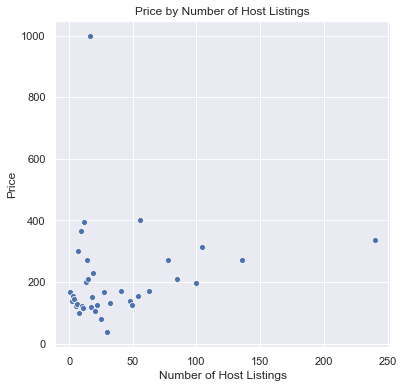

In [9]:
avgHost = bos.groupby('host_id').mean()
avgHost = avgHost[(avgHost['price'] <= 2000)]# & (avgHost['availability_365'] <=)]
avgHost = avgHost.groupby('calculated_host_listings_count', as_index=False).mean()

plt.figure(figsize=(6,6))
plt.title("Price by Number of Host Listings")
sns.scatterplot(data=avgHost, x='calculated_host_listings_count', y='price')
plt.xlabel("Number of Host Listings")
plt.ylabel("Price")
plt.show()